# COMP SCI 7318 A3 Codes

Data source: https://www.kaggle.com/rahulsah06/gooogle-stock-price

In [1]:
%matplotlib inline

In [162]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.utils.data as data
from sklearn.preprocessing import MinMaxScaler

In [165]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [166]:
device

device(type='cuda', index=0)

In [18]:
training_set

array([[325.25, 332.83, 324.97, '663.59'],
       [331.27, 333.87, 329.08, '666.45'],
       [329.83, 330.75, 326.89, '657.21'],
       ...,
       [793.7, 794.23, 783.2, '785.05'],
       [783.33, 785.93, 778.92, '782.79'],
       [782.75, 782.78, 770.41, '771.82']], dtype=object)

In [132]:
trainset = pd.read_csv('C:/Users/WAY/Desktop/CS7318/A3/Google_Stock_Price_Train.csv',parse_dates = ['Date'])

In [133]:
trainset[:10]

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
5,2012-01-10,313.70,315.72,307.30,621.43,"8,824,000"
6,2012-01-11,310.59,313.52,309.40,624.25,"4,817,800"
7,2012-01-12,314.43,315.26,312.08,627.92,"3,764,400"
8,2012-01-13,311.96,312.30,309.37,623.28,"4,631,800"
9,2012-01-17,314.81,314.81,311.67,626.86,"3,832,800"


In [134]:
testset = pd.read_csv('C:/Users/WAY/Desktop/CS7318/A3/Google_Stock_Price_Test.csv',parse_dates = ['Date'])

In [135]:
testset[:10]

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
1,2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2,2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
3,2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
4,2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
5,2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
6,2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
7,2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
8,2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"
9,2017-01-17,807.08,807.14,800.37,804.61,"1,362,100"


In [136]:
print(trainset.shape)
print(testset.shape)

(1258, 6)
(20, 6)


In [137]:
training_set = trainset.iloc[:, 1:6].values

In [138]:
training_set

array([[325.25, 332.83, 324.97, '663.59', '7,380,500'],
       [331.27, 333.87, 329.08, '666.45', '5,749,400'],
       [329.83, 330.75, 326.89, '657.21', '6,590,300'],
       ...,
       [793.7, 794.23, 783.2, '785.05', '1,153,800'],
       [783.33, 785.93, 778.92, '782.79', '744,300'],
       [782.75, 782.78, 770.41, '771.82', '1,770,000']], dtype=object)

In [139]:
train_df = pd.DataFrame(trainset)

In [140]:
train_df

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,"623,400"
1254,2016-12-27,790.68,797.86,787.66,791.55,"789,100"
1255,2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
1256,2016-12-29,783.33,785.93,778.92,782.79,"744,300"


In [141]:
def dropc(x):
    if type(x) == str:
        if ',' in x:
            x =x.replace(',', '')
    else:
        pass

In [142]:
lst =[]
for i in range(len(training_set[:,3])):
    x= training_set[:,3][i]
    x= x.replace(',', '')
    x = float(x)
    lst.append(x)

In [143]:
lst2=[]
for i in range(len(training_set[:,4])):
    x= training_set[:,4][i]
    x= x.replace(',', '')
    x = float(x)
    lst2.append(x)

In [144]:
training_set[:,3] = lst
training_set[:,4] = lst2

In [145]:
training_set

array([[325.25, 332.83, 324.97, 663.59, 7380500.0],
       [331.27, 333.87, 329.08, 666.45, 5749400.0],
       [329.83, 330.75, 326.89, 657.21, 6590300.0],
       ...,
       [793.7, 794.23, 783.2, 785.05, 1153800.0],
       [783.33, 785.93, 778.92, 782.79, 744300.0],
       [782.75, 782.78, 770.41, 771.82, 1770000.0]], dtype=object)

In [147]:
training_set.shape

(1258, 5)

In [148]:
scale = MinMaxScaler(feature_range = (0, 1))

In [149]:
training_set_sc = scale.fit_transform(training_set)

In [150]:
training_set_sc

array([[0.08581368, 0.09640129, 0.09044931, 0.23757287, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.24151427, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.22878051, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.40495845, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.40184391, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.38672602, 0.07056868]])

In [158]:
def split_data(data, lookback):
    d = []
    for i in range(len(data) - lookback):
        d.append(data[i: i + lookback])
        
    d = np.array(d) #turning the list into a numpy array
    validation_size = int(np.round(0.25*d.shape[0]))
    train_size = d.shape[0] - validation_size
    x_train = d[:train_size,:-1,:]
    y_train = d[:train_size,-1,:]
    x_validation = d[train_size:,:-1]
    y_validation = d[train_size:,-1,:]
    return [x_train, y_train, x_validation, y_validation]

In [159]:
lookback = 25
x_train, y_train, x_validation, y_validation = split_data(training_set_sc, lookback)

In [161]:
x_train

array([[[0.08581368, 0.09640129, 0.09044931, 0.23757287, 0.29525831],
        [0.09701243, 0.09834351, 0.09823458, 0.24151427, 0.22993592],
        [0.09433366, 0.09251685, 0.09408623, 0.22878051, 0.26361233],
        ...,
        [0.02273235, 0.02035595, 0.0241135 , 0.12721359, 0.19381258],
        [0.02810849, 0.03027247, 0.0297583 , 0.14263468, 0.2544173 ],
        [0.03212665, 0.04306497, 0.03538415, 0.16016427, 0.29550661]],

       [[0.09701243, 0.09834351, 0.09823458, 0.24151427, 0.22993592],
        [0.09433366, 0.09251685, 0.09408623, 0.22878051, 0.26361233],
        [0.09156187, 0.08881917, 0.08800576, 0.21641884, 0.21617942],
        ...,
        [0.02810849, 0.03027247, 0.0297583 , 0.14263468, 0.2544173 ],
        [0.03212665, 0.04306497, 0.03538415, 0.16016427, 0.29550661],
        [0.0433812 , 0.04173903, 0.04457115, 0.15698083, 0.16787345]],

       [[0.09433366, 0.09251685, 0.09408623, 0.22878051, 0.26361233],
        [0.09156187, 0.08881917, 0.08800576, 0.21641884, 0.2

In [163]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_validate = torch.from_numpy(x_validation).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_validate_lstm = torch.from_numpy(y_validation).type(torch.Tensor)
# y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
# y_validate_gru = torch.from_numpy(y_validation).type(torch.Tensor)

In [197]:
#setting hyperparameters:

input_dim = 5
hidden_dim = 32
num_layers = 2
output_dim = 5
num_epochs = 10000

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        
        self.bidirectional = False
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self,x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out
    
    #def init_hidden(self):

In [198]:
lstm = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers).cuda(device)
criterion = torch.nn.MSELoss(reduction='mean')
#             nn.NLLLoss()
optimiser = torch.optim.Adam(lstm.parameters(), lr=0.01)

In [199]:
def train(y_tensor, x_tensor):
    optimiser.zero_grad()
    lstm.hidden = lstm.forward(x_tensor)#.to(device)#init_hidden()
    
    output = lstm(x_tensor)[-1]
    loss = criterion(output.unsqueeze(0), y_tensor)
    loss.backward()
    optimiser.step()
    
    return output.unsqueeze(0), loss.item()

In [220]:
# import time
# import math
# n_iters = 10000
# print_every = 1000
# plot_every = 1000

# current_loss = 0
# all_losses = []

# def timeSince(since):
#     now = time.time()
#     s = now - since
#     m = math.floor(s / 60)
#     s -= m * 60
#     return '%dm %ds' % (m, s)

# start = time.time()
# for iter in range(1, n_iters + 1):
#     #category, line, category_tensor, line_tensor = randomTrainingExample()
#     output, loss = train(y_train_lstm.cuda(device), x_train.cuda(device))
#     current_loss += loss

#     if iter % print_every == 0:
#         #guess, guess_i = categoryFromOutput(output)
#         #correct = '✓' if guess == category else '✗ (%s)' % category
#         print( iter, iter / n_iters * 100, timeSince(start), loss)

#     if iter % plot_every == 0:
#         all_losses.append(current_loss / plot_every)
#         current_loss = 0

In [200]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
l = []
print_every =1000
for t in range(num_epochs):
    y_train_pred = lstm(x_train.cuda(device)) #model(x_train)
    loss = criterion(y_train_pred, y_train_lstm.cuda(device))
    if (t+1) % print_every == 0:
        print("Epoch ", t, "loss: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  999 loss:  0.0010243015130981803
Epoch  1999 loss:  0.0009853524388745427
Epoch  2999 loss:  0.00028890525572933257
Epoch  3999 loss:  7.970406295498833e-05
Epoch  4999 loss:  6.243187090149149e-05
Epoch  5999 loss:  1.7703570847515948e-05
Epoch  6999 loss:  0.00034996605245396495
Epoch  7999 loss:  7.989122968865559e-05
Epoch  8999 loss:  4.077339326613583e-05
Epoch  9999 loss:  2.522383874747902e-05
Training time: 46.223185539245605


In [201]:
y_train_pred

tensor([[0.0447, 0.0451, 0.0427, 0.1614, 0.1758],
        [0.0471, 0.0466, 0.0467, 0.1617, 0.1524],
        [0.0510, 0.0497, 0.0472, 0.1676, 0.1853],
        ...,
        [0.6792, 0.6907, 0.6827, 0.2137, 0.0902],
        [0.6706, 0.6776, 0.6737, 0.2064, 0.0897],
        [0.6750, 0.6846, 0.6774, 0.2089, 0.0751]], device='cuda:0',
       grad_fn=<AddmmBackward>)

In [203]:
y_train_pred[:,-2]

tensor([0.1614, 0.1617, 0.1676, 0.1590, 0.1664, 0.1628, 0.1588, 0.1568, 0.1576,
        0.1643, 0.1656, 0.1565, 0.1611, 0.1630, 0.1718, 0.1759, 0.1795, 0.1843,
        0.1727, 0.1599, 0.1600, 0.1572, 0.1535, 0.1579, 0.1718, 0.1720, 0.1769,
        0.1819, 0.1981, 0.1951, 0.2040, 0.2098, 0.2139, 0.2140, 0.2191, 0.2216,
        0.2180, 0.2127, 0.2089, 0.2070, 0.1983, 0.1931, 0.1918, 0.1893, 0.1990,
        0.2205, 0.1890, 0.1556, 0.1643, 0.1570, 0.1503, 0.1422, 0.1468, 0.1511,
        0.1592, 0.1672, 0.1666, 0.1625, 0.1540, 0.1556, 0.1605, 0.1591, 0.1590,
        0.1653, 0.1608, 0.1685, 0.1627, 0.1553, 0.1654, 0.1876, 0.1837, 0.1512,
        0.1658, 0.1524, 0.1627, 0.1520, 0.1372, 0.1429, 0.1335, 0.1272, 0.1124,
        0.1198, 0.1086, 0.1231, 0.1250, 0.1199, 0.1113, 0.0969, 0.0989, 0.0976,
        0.0985, 0.1105, 0.1245, 0.1209, 0.1061, 0.1100, 0.0985, 0.1007, 0.1085,
        0.1047, 0.1208, 0.1238, 0.1306, 0.1426, 0.1285, 0.1361, 0.1281, 0.1126,
        0.1126, 0.1179, 0.1142, 0.1133, 

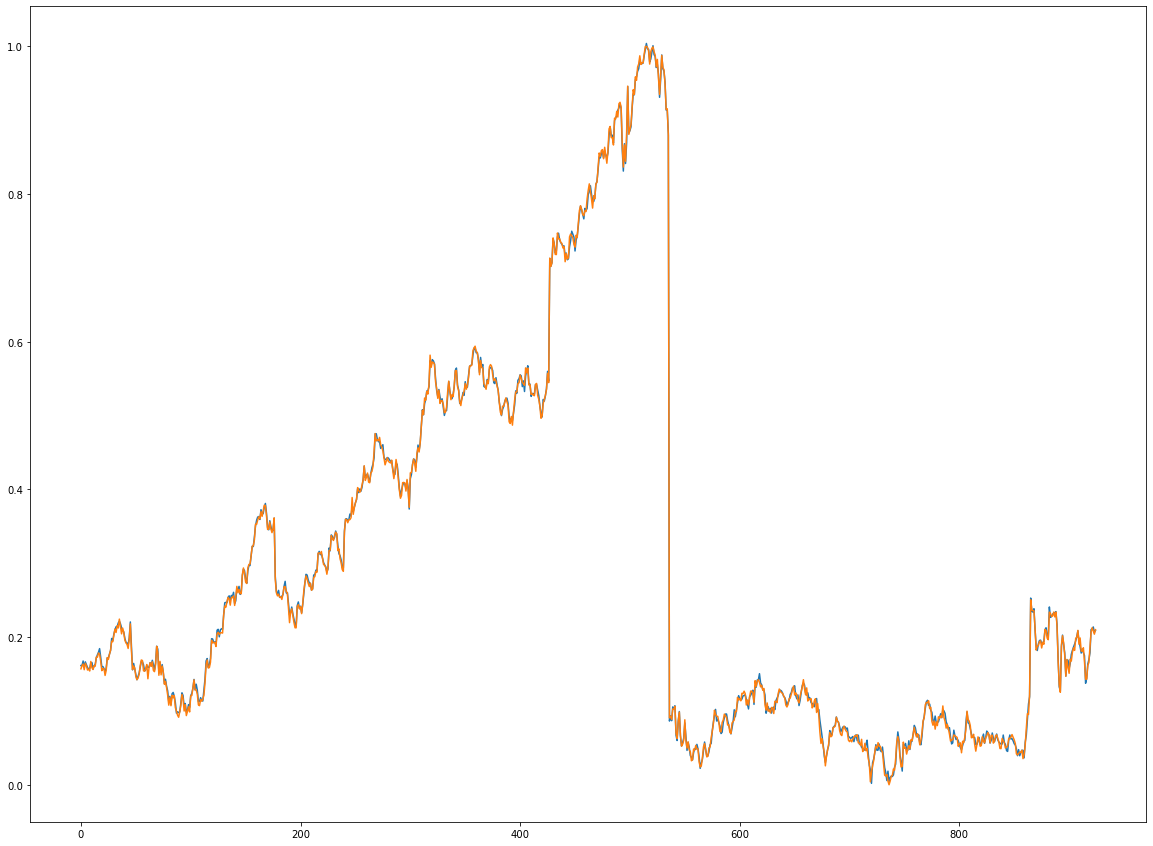

In [213]:
y_train_pred_cpu = y_train_pred.cpu().detach().numpy()
plt.figure(figsize=(20,15))
plt.plot(y_train_pred_cpu[:,-2])
plt.plot(y_train_lstm[:,-2])

D:\WAY\Anaconda3\envs\pytorch_env_2020_9\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x00000250C280FE88>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
D:\WAY\Anaconda3\envs\pytorch_env_2020_9\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x00000250C282A148>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


Text(0.5, 0, 'Date sequence')

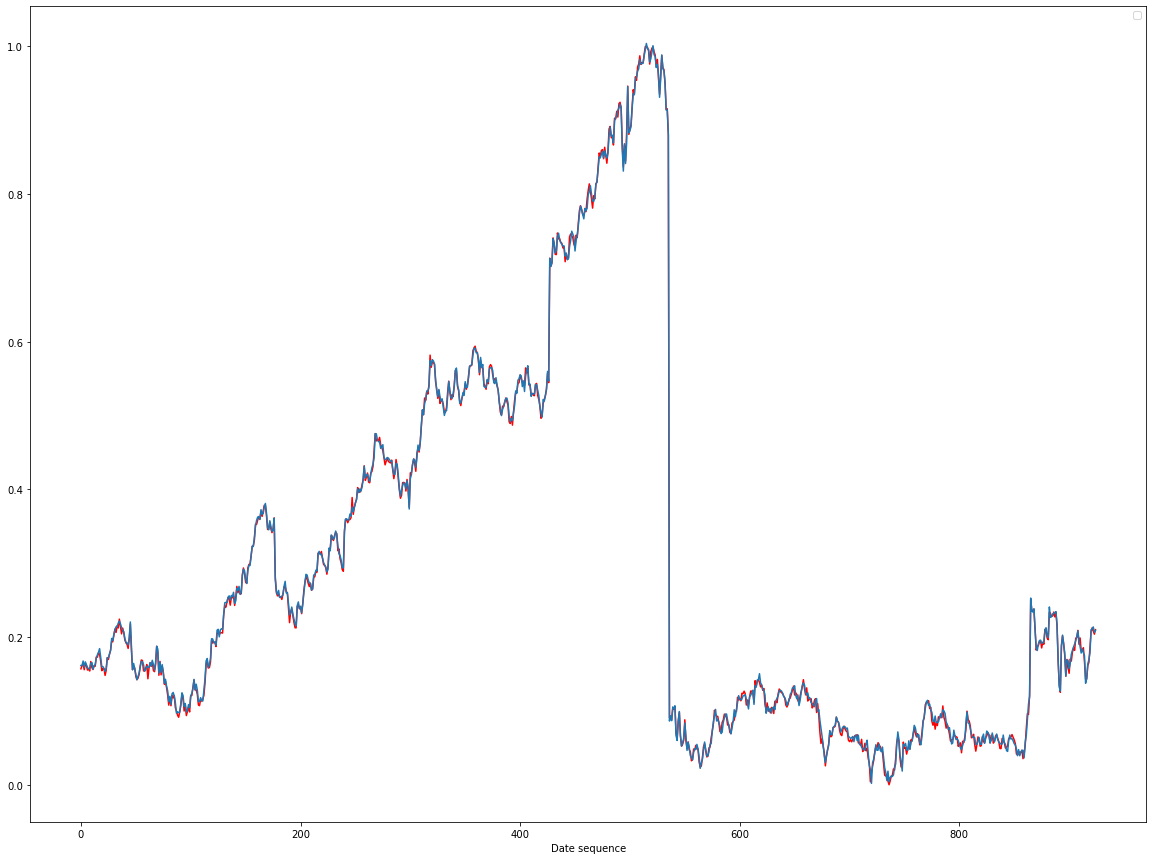

In [231]:
y_train_pred_cpu = y_train_pred.cpu().detach().numpy()
fig2=plt.figure(figsize=(20,15))
l2=plt.plot(y_train_lstm[:,-2],color='red')
l1=plt.plot(y_train_pred_cpu[:,-2])

plt.legend(handles=[l1,l2],labels=['Predicted','Ground truth'],loc='best')
fig.suptitle('Predicted closing price against the ground truth')
plt.xlabel('Date sequence')
#plt.ylabel('Scaled closing prices')

In [232]:
y_validate_pred = lstm(x_validate.cuda(device))

In [233]:
y_validate_pred

tensor([[0.6749, 0.6814, 0.6785, 0.2064, 0.0847],
        [0.6916, 0.6963, 0.6908, 0.2143, 0.0806],
        [0.6983, 0.7033, 0.6965, 0.2180, 0.0983],
        ...,
        [0.9152, 0.9367, 0.9016, 0.3761, 0.2284],
        [0.9192, 0.9411, 0.9057, 0.3803, 0.2333],
        [0.9173, 0.9402, 0.9048, 0.3790, 0.2443]], device='cuda:0',
       grad_fn=<AddmmBackward>)

In [235]:
y_validate_pred.shape

torch.Size([308, 5])

D:\WAY\Anaconda3\envs\pytorch_env_2020_9\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x00000250C3391C08>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
D:\WAY\Anaconda3\envs\pytorch_env_2020_9\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x00000250C3391C88>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


Text(0.5, 0, 'Date sequence')

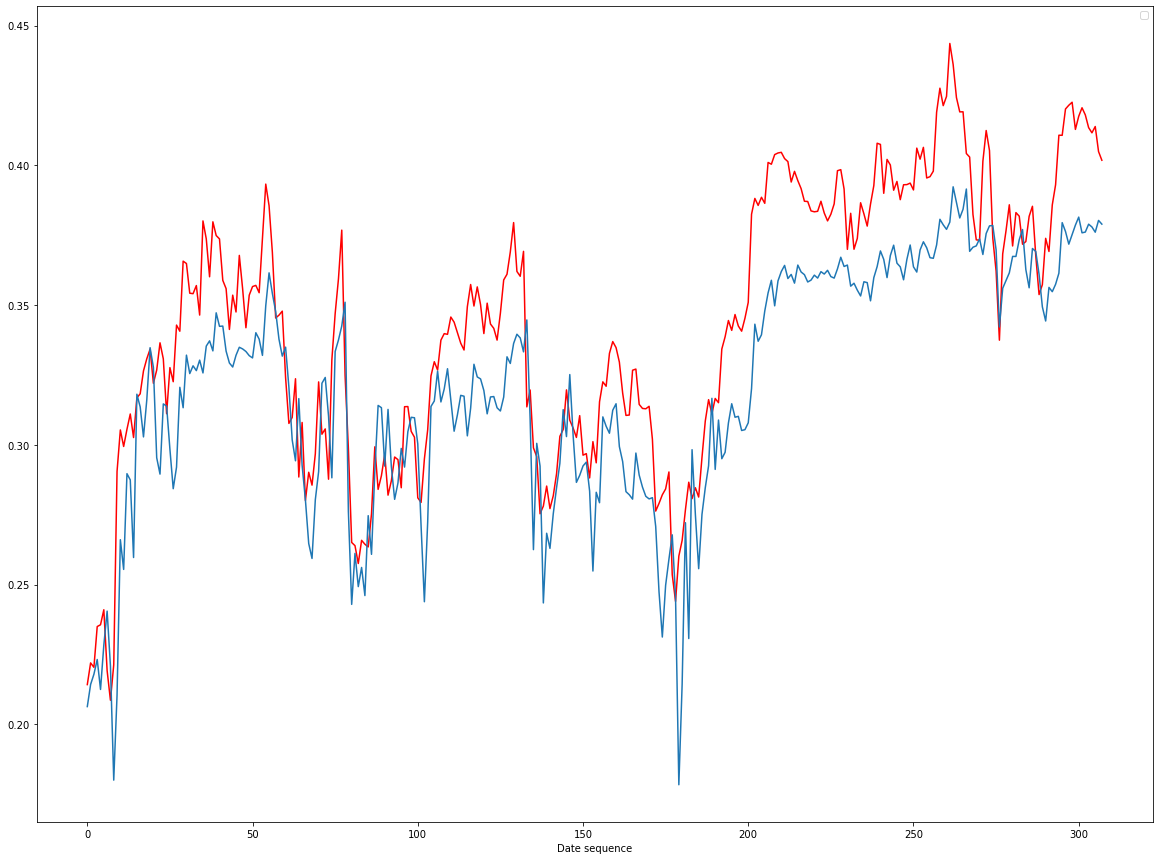

In [236]:
y_validate_pred_cpu = y_validate_pred.cpu().detach().numpy()
fig3=plt.figure(figsize=(20,15))
l2=plt.plot(y_validate_lstm[:,-2],color='red')
l1=plt.plot(y_validate_pred_cpu[:,-2])

plt.legend(handles=[l1,l2],labels=['Predicted','Ground truth'],loc='best')
fig.suptitle('Predicted closing price against the ground truth')
plt.xlabel('Date sequence')
#plt.ylabel('Scaled closing prices')

In [237]:
loss = criterion(y_validate_pred, y_validate_lstm.cuda(device))

In [241]:
loss #MSE 

tensor(0.0051, device='cuda:0', grad_fn=<MseLossBackward>)

D:\WAY\Anaconda3\envs\pytorch_env_2020_9\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


NameError: name 'buffer_' is not defined

<Figure size 1440x1080 with 0 Axes>

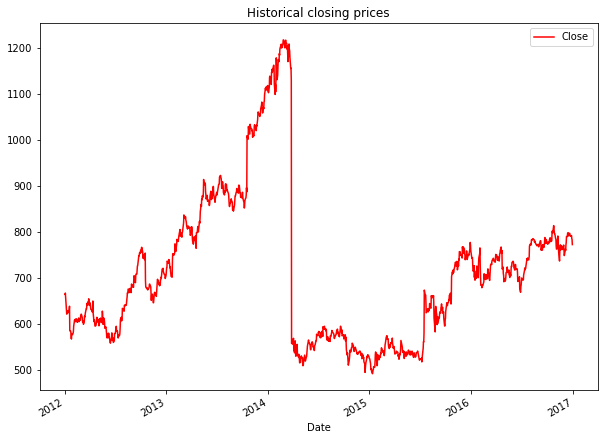

In [256]:
figTotal= plt.figure(figsize=(20,15))
train_close_df = trainset.iloc[:, [0] ]
train_close_df["Close"] = training_set[:,3]
#axT = train_close_df.plot( title="Historical closing prices",figsize=(10,7.5))
axT = train_close_df.set_index('Date').plot(title="Historical closing prices",figsize=(10,7.5),color='r')
train_close_df

figTotal.savefig(buffer_, format = "png")

In [244]:
trainset


,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,"623,400"
1254,2016-12-27,790.68,797.86,787.66,791.55,"789,100"
1255,2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
1256,2016-12-29,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
market discount everything

Since our sampling is daily, the degree of precision is too large to guide any "high-frequency" trading that trades very frequently within a day.

Time scale: days

In [243]:
# integrate decision guidance into the training data frame
#decision = -1 or +1 which represents buy or sell

#decision = -1 or 0 or +1, where 0 represents HOLDing
## holds when the (future/predicted) open and close are sticking together closely 

Use the programmed (exact) trading algorithms

Conservative approach:
"trading on the left side" wait for the signal of the market
Inactive/Hold untill a predicted change of more than ____ (20%) .

stop loss
